## Imporing Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data preprocessing

### Training Image Preprocessing

In [9]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [12]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[ 93.    93.    95.  ]
   [ 95.5   95.5   97.5 ]
   [ 90.5   90.5   92.5 ]
   ...
   [ 84.    85.    80.  ]
   [ 83.75  84.75  79.75]
   [ 80.75  81.75  76.75]]

  [[ 95.25  95.25  97.25]
   [ 94.75  94.75  96.75]
   [ 95.5   95.5   97.5 ]
   ...
   [ 80.25  81.25  76.25]
   [ 81.5   82.5   77.5 ]
   [ 82.25  83.25  78.25]]

  [[ 95.5   95.5   97.5 ]
   [ 96.75  96.75  98.75]
   [ 97.75  97.75  99.75]
   ...
   [ 85.25  86.25  81.25]
   [ 85.75  86.75  81.75]
   [ 81.    82.    77.  ]]

  ...

  [[134.5  138.5  139.5 ]
   [135.   139.   140.  ]
   [132.5  136.5  137.5 ]
   ...
   [ 38.75  30.75  27.75]
   [ 38.25  30.25  27.25]
   [ 37.75  29.75  26.75]]

  [[135.   139.   140.  ]
   [138.   142.   143.  ]
   [136.   140.   141.  ]
   ...
   [ 26.25  18.25  15.25]
   [ 26.75  18.75  15.75]
   [ 27.25  19.25  16.25]]

  [[130.5  134.5  135.5 ]
   [135.   139.   140.  ]
   [134.   138.   139.  ]
   ...
   [ 17.75   9.75   6.75]
   [ 18.75  10.75   7.75]
   [ 19.25  11.25   

### To Avoid Overshooting
1. Choose small learning rate default 0.001, we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neurons
3. Add more Convolution layer to extract more feature from image , there may be possibility thta model is unable to capture relevant features or model is confused deu to lack of features , so add more features

## Building Model

In [69]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [70]:
model = Sequential()

### Building Convolution layer

In [71]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [72]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [73]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [74]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [75]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [76]:
model.add(Dropout(0.25)) # Avoid overfitting

In [77]:
model.add(Flatten())

In [78]:
model.add(Dense(units=1500,activation="relu"))

In [79]:
model.add(Dropout(0.4))

In [80]:
#Output Layer
model.add(Dense(units=38,activation="softmax"))

### Compiling Model

In [81]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_44 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_46 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

### Model Training

In [83]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 378s 169ms/step - loss: 1.3351 - accuracy: 0.6057 - val_loss: 0.4881 - val_accuracy: 0.8448
Epoch 2/10
2197/2197 [==============================] - 263s 120ms/step - loss: 0.4482 - accuracy: 0.8580 - val_loss: 0.2692 - val_accuracy: 0.9139
Epoch 3/10
2197/2197 [==============================] - 253s 115ms/step - loss: 0.2608 - accuracy: 0.9153 - val_loss: 0.1936 - val_accuracy: 0.9357
Epoch 4/10
2197/2197 [==============================] - 256s 117ms/step - loss: 0.1875 - accuracy: 0.9390 - val_loss: 0.1795 - val_accuracy: 0.9411
Epoch 5/10
2197/2197 [==============================] - 256s 116ms/step - loss: 0.1399 - accuracy: 0.9538 - val_loss: 0.1603 - val_accuracy: 0.9494
Epoch 6/10
2197/2197 [==============================] - 252s 115ms/step - loss: 0.1087 - accuracy: 0.9648 - val_loss: 0.1705 - val_accuracy: 0.9475
Epoch 7/10
2197/2197 [==============================] - 255s 116ms/step - loss: 0.0860 - accuracy: 0.9714 - val_

## Model Evaluation

In [84]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 101s 46ms/step - loss: 0.0341 - accuracy: 0.9885


In [85]:
print(train_loss,train_acc)

0.034125130623579025 0.9885056018829346


In [86]:
#Model Evaluation on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 27s 48ms/step - loss: 0.1329 - accuracy: 0.9610


In [87]:
print(val_loss,val_acc)

0.1328733265399933 0.9609606266021729


## Saving Model

In [88]:
model.save("trained_model.h5")

In [89]:
model.save("trained_model.keras")

In [90]:
training_history.history

{'loss': [1.3350926637649536,
  0.44815483689308167,
  0.26084232330322266,
  0.18753311038017273,
  0.13989709317684174,
  0.10867997258901596,
  0.08602257072925568,
  0.0727563127875328,
  0.06677418202161789,
  0.060520388185977936],
 'accuracy': [0.6057329773902893,
  0.8580411076545715,
  0.9152713418006897,
  0.9390426278114319,
  0.9537520408630371,
  0.9648054838180542,
  0.9714346528053284,
  0.9773525595664978,
  0.9784764051437378,
  0.9808948040008545],
 'val_loss': [0.4880623519420624,
  0.26922377943992615,
  0.19363383948802948,
  0.1795395314693451,
  0.16028723120689392,
  0.17050416767597198,
  0.11991896480321884,
  0.125684455037117,
  0.12483406811952591,
  0.13287325203418732],
 'val_accuracy': [0.8447530269622803,
  0.9138970971107483,
  0.9356931447982788,
  0.9410994648933411,
  0.9493512511253357,
  0.9475301504135132,
  0.9626109600067139,
  0.9625540375709534,
  0.9627817273139954,
  0.9609606266021729]}

In [92]:
#Recording Model History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f) 

## Accuracy Visualization

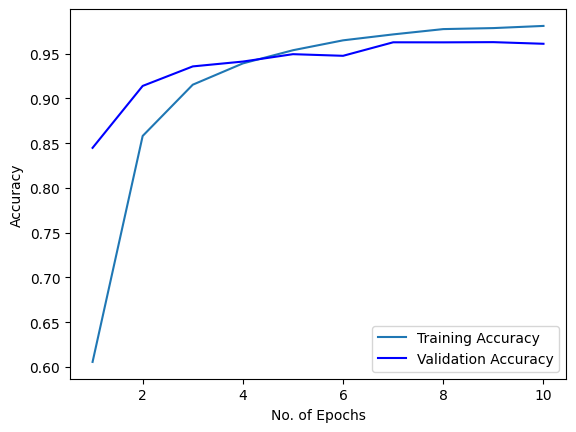

In [99]:
epochs = [ i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],label="Training Accuracy",color="red")
plt.plot(epochs,training_history.history["val_accuracy"],label="Validation Accuracy",color="blue")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Some other metrics to evaluate the model

In [101]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [102]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [103]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 24s 43ms/step


(array([[9.9999988e-01, 1.0951701e-08, 9.1038713e-12, ..., 3.7162422e-16,
         2.4753161e-15, 4.1399344e-13],
        [9.9997580e-01, 8.7172402e-06, 5.4904823e-09, ..., 1.3707903e-13,
         9.0930610e-13, 1.4903982e-10],
        [1.0000000e+00, 8.6082634e-09, 2.1360891e-10, ..., 2.2656271e-16,
         1.4337905e-14, 2.0641258e-11],
        ...,
        [2.2498510e-14, 8.0587625e-18, 4.1958299e-12, ..., 2.7799111e-15,
         2.7581277e-17, 1.0000000e+00],
        [1.2803810e-12, 1.1678831e-16, 1.8313948e-11, ..., 5.5400325e-14,
         1.4836093e-15, 1.0000000e+00],
        [2.5685160e-16, 7.4941013e-19, 1.3686529e-16, ..., 3.2343561e-19,
         1.6121507e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [104]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [112]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [113]:
true_categories = tf.concat([ y for x,y in test_set ],axis=0)

In [114]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [115]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

### precision and recall

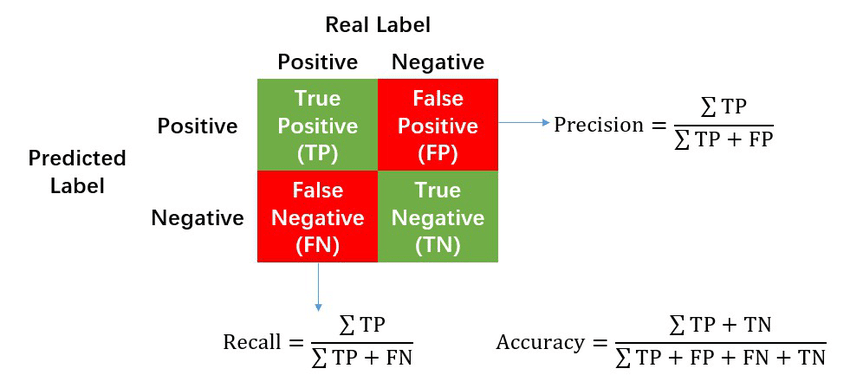

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.95       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.87      0.90       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.96      0.

In [121]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[470,   1,   1, ...,   0,   0,   0],
       [  3, 475,   0, ...,   0,   0,   0],
       [  0,   0, 432, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 442,   0],
       [  0,   0,   0, ...,   0,   0, 478]], dtype=int64)

### Confusion matrix visualization

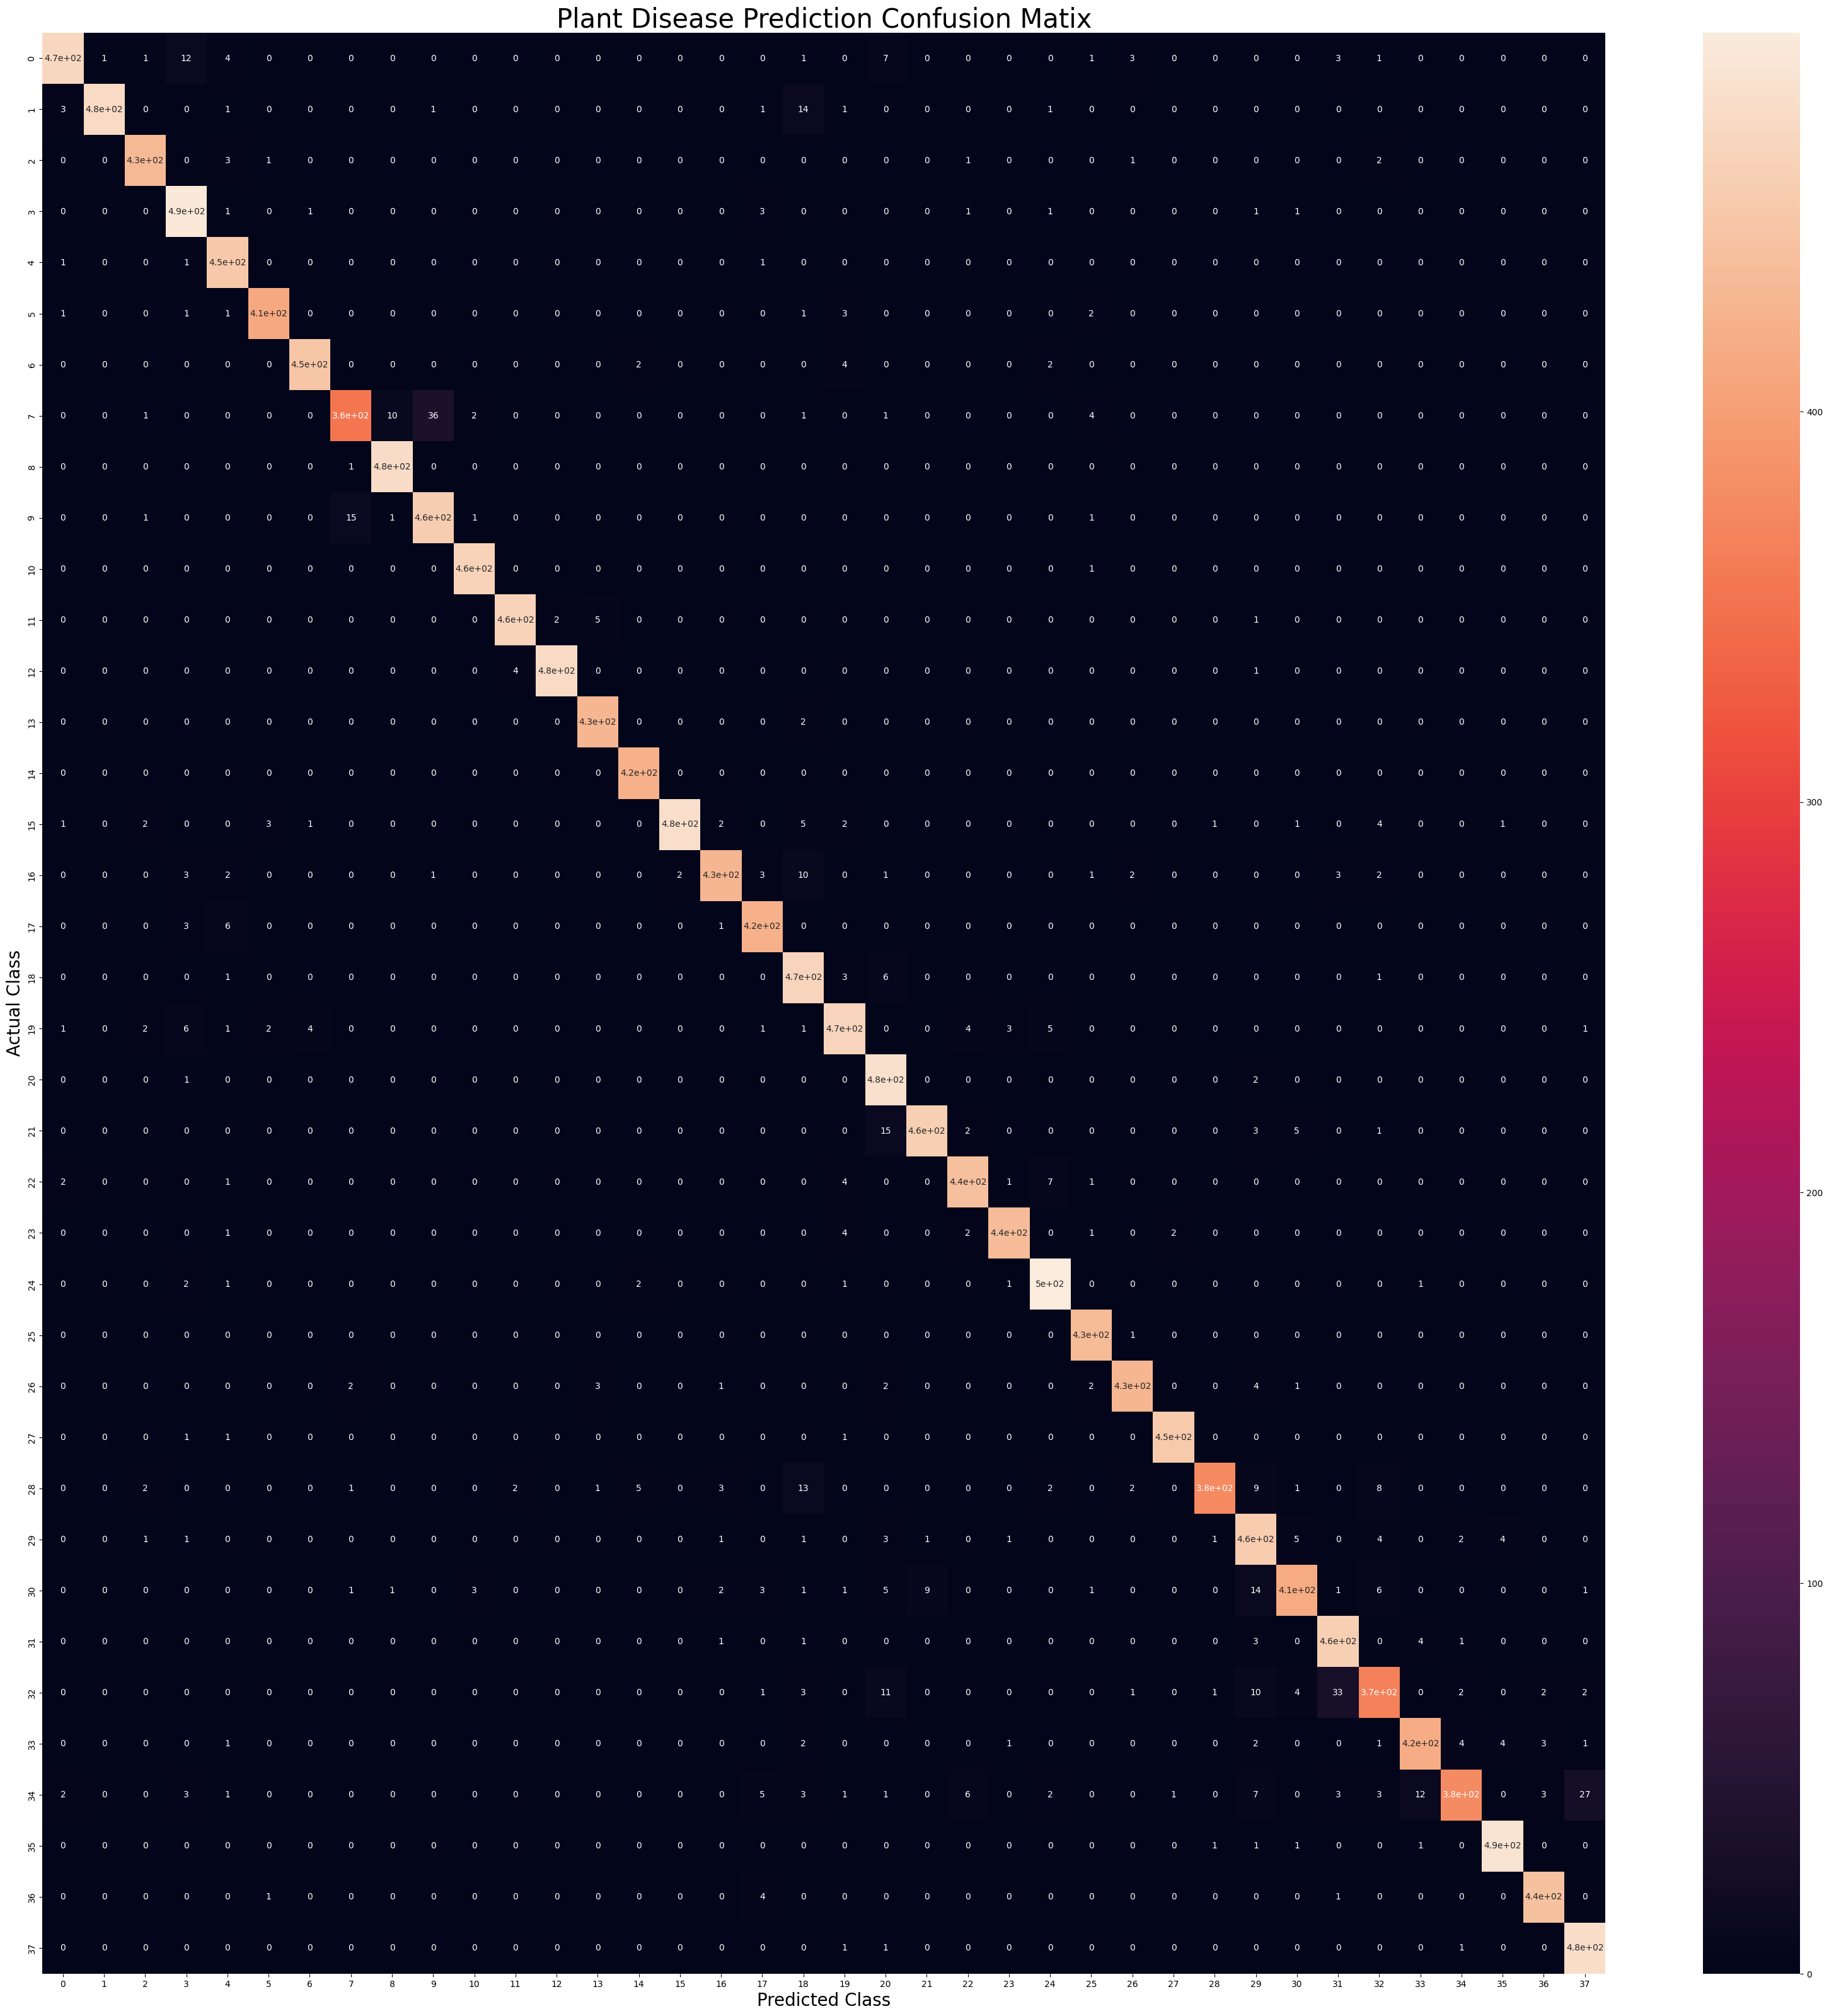

In [133]:
plt.figure(figsize=[40,40])
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matix",fontsize=30)
plt.show()